<a href="https://colab.research.google.com/github/Hrutujahh/BootStrap-Practice/blob/main/MLPBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_set = "/content/drive/MyDrive/Data/"

In [ ]:
%cd /content/drive/MyDrive/Data/

/content/drive/MyDrive/Data


In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=d4405ad987ccb762ef3177a91c5b7f9afe339d398246f311a83d32a80ee5e5cf
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import os
import librosa
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import scipy.io.wavfile as wav
from tempfile import TemporaryFile
from sklearn.model_selection import train_test_split
from python_speech_features import mfcc
import random
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import pandas as pd
import tensorflow as tf
import pickle
import math
from tensorflow import keras
import scipy
from google.colab import drive
from collections import Counter
import json
import heapq
import re
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import collections

In [ ]:
genres=os.listdir("/content/drive/MyDrive/Data/genres_original")

In [ ]:
print(genres)

['rock', 'metal', 'jazz', 'hiphop', 'disco', 'reggae', 'blues', 'classical', 'country', 'pop']


In [ ]:
file_length=[]
for genre in genres:
  print(len(os.listdir("/content/drive/MyDrive/Data/genres_original/"+genre)))
  file_length.append(len(os.listdir("/content/drive/MyDrive/Data/genres_original/"+genre)))

100
100
99
100
100
100
100
100
100
100


In [ ]:
df = pd.DataFrame({'genre': np.array(genres), '# of samples': file_length})

In [ ]:
df

,genre,# of samples
0,rock,100
1,metal,100
2,jazz,99
3,hiphop,100
4,disco,100
5,reggae,100
6,blues,100
7,classical,100
8,country,100
9,pop,100


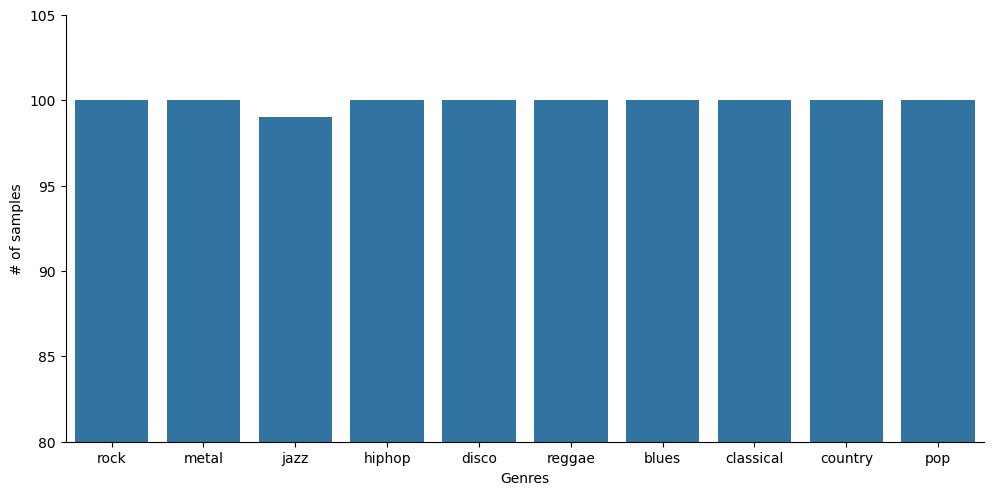

In [ ]:
import seaborn as sns
sns.catplot(x="genre", y="# of samples", kind='bar',data=df,height=5, aspect=2)
plt.xlabel("Genres")
plt.ylabel("# of samples")
plt.ylim(80, None)
plt.show()

In [ ]:
import os

# Ensure the parent directory exists
parent_dir = "/content/drive/MyDrive/Data/Data_Augmented/"
if not os.path.exists(parent_dir):
    os.makedirs(parent_dir)

# Create subdirectories for each genre
for genre in genres:
    genre_dir = os.path.join(parent_dir, genre)
    try:
        os.mkdir(genre_dir)
    except FileExistsError:
        print(f"Directory '{genre_dir}' already exists.")


Directory '/content/drive/MyDrive/Data/Data_Augmented/rock' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/metal' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/jazz' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/hiphop' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/disco' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/reggae' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/blues' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/classical' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/country' already exists.
Directory '/content/drive/MyDrive/Data/Data_Augmented/pop' already exists.


In [ ]:
import soundfile as sf

In [ ]:
!pip install librosa

In [ ]:
import os
import librosa
import soundfile as sf
import audioread

# Ensure destination directory exists
output_dir = '/content/drive/MyDrive/Data/Data_Augmented/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for genre in genres:
    for file in os.listdir('/content/drive/MyDrive/Data/genres_original/' + genre):
        try:
            # Attempt to load audio file using soundfile
            audio, sr = sf.read('/content/drive/MyDrive/Data/genres_original/' + genre + '/' + file)
        except Exception as e:
            # If soundfile fails, try using audioread
            try:
                with audioread.audio_open('/content/drive/MyDrive/Data/genres_original/' + genre + '/' + file) as f:
                    audio = f.read()
                    sr = f.samplerate
            except Exception as e:
                print(f"Error loading file {file}: {e}")
                continue

        # Get number of samples for 10 seconds; replace 10 by any number
        buffer = 10 * sr
        samples_total = len(audio)
        samples_wrote = 0
        counter = 1
        audio = audio[:buffer * 10]

        while samples_wrote < samples_total:
            # Check if the buffer is not exceeding total samples
            if buffer > (samples_total - samples_wrote):
                buffer = samples_total - samples_wrote

            block = audio[samples_wrote : (samples_wrote + buffer)]
            out_filename = os.path.join(output_dir, genre, file[:-4] + "_split_" + str(counter))

            try:
                sf.write(out_filename + '.wav', block, sr)
            except Exception as e:
                print(f"Error writing file {out_filename}.wav: {e}")
                break

            counter += 1
            samples_wrote += buffer


In [ ]:
len(os.listdir("/content/drive/MyDrive/Data/Data_Augmented/disco"))

399

In [ ]:
genres

['rock',
 'metal',
 'jazz',
 'hiphop',
 'disco',
 'reggae',
 'blues',
 'classical',
 'country',
 'pop']

In [ ]:
file_length=[]
for genre in genres:
  file_length.append(len(os.listdir("/content/drive/MyDrive/Data/Data_Augmented/"+genre)))

In [ ]:
df = pd.DataFrame({'genre': np.array(genres), '# of samples': file_length})

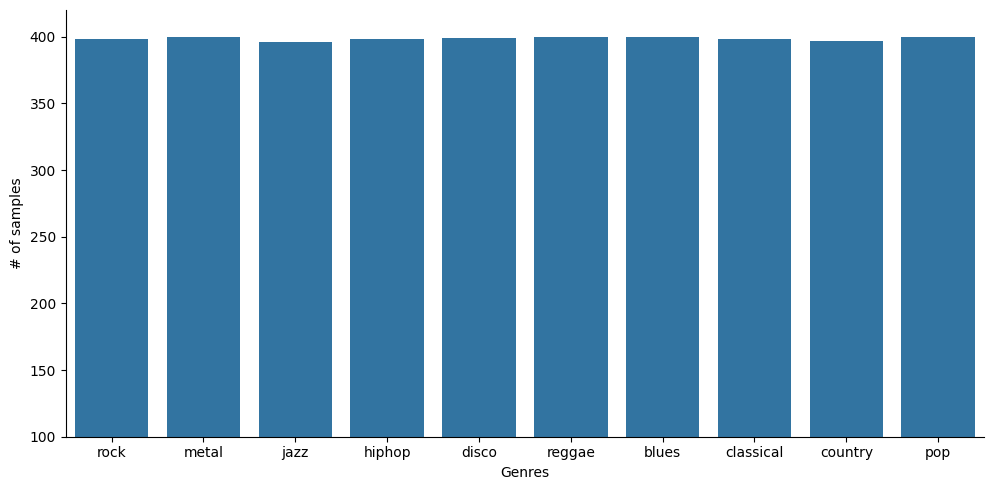

In [ ]:
import seaborn as sns
sns.catplot(x="genre", y="# of samples", kind='bar',data=df,height=5, aspect=2)
plt.xlabel("Genres")
plt.ylabel("# of samples")
plt.ylim(100, None)
plt.show()

In [ ]:
mfcc_cols_mean=['mfcc_'+str(i)+'_mean' for i in range(1,21)]
mfcc_cols_var=['mfcc_'+str(i)+'_var' for i in range(1,21)]
cols=mfcc_cols_mean+mfcc_cols_var+['spec_centroid_mean','spec_centroid_variance','spec_rolloff_mean','spec_rolloff_var','spectral bandwidth','tempo','rms_mean','genre']

In [ ]:
cols

['mfcc_1_mean',
 'mfcc_2_mean',
 'mfcc_3_mean',
 'mfcc_4_mean',
 'mfcc_5_mean',
 'mfcc_6_mean',
 'mfcc_7_mean',
 'mfcc_8_mean',
 'mfcc_9_mean',
 'mfcc_10_mean',
 'mfcc_11_mean',
 'mfcc_12_mean',
 'mfcc_13_mean',
 'mfcc_14_mean',
 'mfcc_15_mean',
 'mfcc_16_mean',
 'mfcc_17_mean',
 'mfcc_18_mean',
 'mfcc_19_mean',
 'mfcc_20_mean',
 'mfcc_1_var',
 'mfcc_2_var',
 'mfcc_3_var',
 'mfcc_4_var',
 'mfcc_5_var',
 'mfcc_6_var',
 'mfcc_7_var',
 'mfcc_8_var',
 'mfcc_9_var',
 'mfcc_10_var',
 'mfcc_11_var',
 'mfcc_12_var',
 'mfcc_13_var',
 'mfcc_14_var',
 'mfcc_15_var',
 'mfcc_16_var',
 'mfcc_17_var',
 'mfcc_18_var',
 'mfcc_19_var',
 'mfcc_20_var',
 'spec_centroid_mean',
 'spec_centroid_variance',
 'spec_rolloff_mean',
 'spec_rolloff_var',
 'spectral bandwidth',
 'tempo',
 'rms_mean',
 'genre']

In [ ]:
len(cols)

48

In [ ]:
directory = "/content/drive/MyDrive/Data/Data_Augmented"
F_feat = []

for z, genre in enumerate(genres, start=1):
    genre_d = os.path.join(directory, genre)
    for file in os.listdir(genre_d):
        if file.endswith(".wav"):
          file_path = os.path.join(genre_d, file)
          y, sr = librosa.load(file_path)
          mfcc_features = librosa.feature.mfcc(y=y, sr=sr,n_mels=128, n_mfcc=20)
          mfcc_mean = np.mean(mfcc_features, axis=1)
          mfcc_variance=np.var(mfcc_features,axis=1)
          # print('mfcc_mean',mfcc_mean)
          # print('mfcc_var',mfcc_variance)
          spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
          spec_centroid_mean=np.mean(spec_centroid,axis=1)
          spec_centroid_var=np.var(spec_centroid,axis=1)
          # print('spec_centroid_mean',spec_centroid_mean)
          # print('spec_centroid_var',spec_centroid_var)
          spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
          spec_rolloff_mean=np.mean(spec_rolloff,axis=1)
          spec_rolloff_var=np.var(spec_rolloff,axis=1)
          # print('spec_rolloff_mean',spec_rolloff_mean)
          # print('spec_rolloff_var',spec_rolloff_var)
          #spectral bandwidth
          spectral_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
          spectral_bw_mean=np.mean(spectral_bw,axis=1)
          # print("spectral_bandwidth",spectral_bw_mean)
          #temp0
          tempo = librosa.beat.tempo(y=y, sr=sr)
          # print("tempo",tempo)
          #loudness
          rms = librosa.feature.rms(y=y)
          rms_mean=np.mean(rms,axis=1)
          # print("rms_mean",rms_mean)
          X_vals_array=np.concatenate([mfcc_mean,mfcc_variance,spec_centroid_mean,spec_centroid_var,spec_rolloff_mean,spec_rolloff_var,spectral_bw_mean,tempo,rms_mean,[z]])
          # c_v = np.cov(mfcc_features)
          F_feat.append(X_vals_array)

df=pd.DataFrame(np.array(F_feat),columns=cols)

<ipython-input-24-2930d4208b4b>:30: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=294
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=4
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=176
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=480
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length

In [ ]:
df.shape

(3986, 48)

In [ ]:
df.to_csv('music_features.csv')

In [ ]:
df['genre'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/music_features.csv',index_col=False)

In [ ]:
df.head()

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,mfcc_19_var,mfcc_20_var,spec_centroid_mean,spec_centroid_variance,spec_rolloff_mean,spec_rolloff_var,spectral bandwidth,tempo,rms_mean,genre
0,-67.351303,146.204636,-53.354305,29.547867,-10.435096,21.296473,-24.711758,18.076807,-14.858020,3.815214,...,34.171494,33.112511,1606.286848,108047.021500,3030.785850,704574.986651,1663.580446,99.384014,0.191822,1.0
1,-59.788853,148.161453,-54.337208,31.344433,-7.829247,19.267509,-26.013477,19.408636,-15.480834,6.049288,...,27.395847,35.688065,1591.311417,126778.259712,2992.790488,653087.501875,1657.018013,99.384014,0.208456,1.0
2,-71.136703,164.052444,-53.134010,1.990109,7.219748,-12.426989,-18.091373,-2.741980,-4.764364,3.742459,...,0.000000,0.000000,1424.295935,0.000000,2217.919922,0.000000,1421.521832,117.453835,0.106319,1.0
3,-60.468910,167.319382,-57.875553,23.385685,-2.472709,12.046638,-17.265024,17.127127,-7.572172,3.790375,...,24.097525,21.861420,1427.784039,82168.426887,2584.309122,397189.499177,1455.683948,99.384014,0.210308,1.0
4,-0.416057,139.353989,-44.673450,27.494558,-20.540037,33.256783,-21.571201,18.777693,-20.615160,16.379784,...,15.409590,18.337385,1753.930232,31008.513361,3464.097847,243503.449368,1869.159177,112.347147,0.268146,1.0


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.describe()

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,mfcc_19_var,mfcc_20_var,spec_centroid_mean,spec_centroid_variance,spec_rolloff_mean,spec_rolloff_var,spectral bandwidth,tempo,rms_mean,genre
count,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,...,3986.000000,3986.000000,3986.000000,3.986000e+03,3986.000000,3.986000e+03,3986.000000,3986.000000,3986.000000,3986.000000
mean,-161.378969,96.896896,-9.363188,32.219458,-0.691473,12.380684,-4.317946,8.757311,-6.233997,6.777610,...,47.371846,49.971588,2308.059826,3.418675e+05,4743.891563,1.336474e+06,2303.953064,120.562229,0.107238,5.501756
std,110.966070,36.212322,22.976142,19.197327,12.927825,13.329457,10.679114,11.017857,9.040313,8.728680,...,44.419471,49.837048,870.910130,4.095635e+05,1768.050847,1.473731e+06,527.893178,18.699559,0.074009,2.872466
min,-1131.370850,-97.530563,-96.176956,-65.992523,-55.920963,-48.220638,-45.250446,-33.480228,-38.579155,-23.254135,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,61.523438,0.000000,1.000000
25%,-224.304897,72.121197,-25.614861,18.529601,-9.914324,2.720208,-12.644785,0.760302,-12.853095,0.488732,...,18.113339,17.654509,1658.734834,2.365480e+04,3434.545898,1.043134e+05,1969.048151,112.347147,0.044216,3.000000
50%,-139.216232,96.657467,-11.426023,32.367826,0.248361,12.058965,-3.810446,7.938177,-6.208483,6.363705,...,42.314301,42.418589,2241.452868,2.088630e+05,4722.416301,9.026585e+05,2279.476514,117.453835,0.102096,6.000000
75%,-79.050745,120.193935,6.175398,46.468456,8.739355,23.002347,3.701652,17.517951,0.416083,13.681953,...,65.950895,68.380478,2822.949287,4.843520e+05,5819.085849,1.958058e+06,2672.191739,129.199219,0.156263,8.000000
max,106.943062,233.001633,75.754776,83.337151,42.122543,49.285904,33.447727,53.953762,26.816826,37.845589,...,560.703064,712.592102,8374.446420,3.347463e+06,10400.537109,9.884046e+06,3850.839325,287.109375,0.428984,10.000000


<Figure size 2000x2000 with 0 Axes>

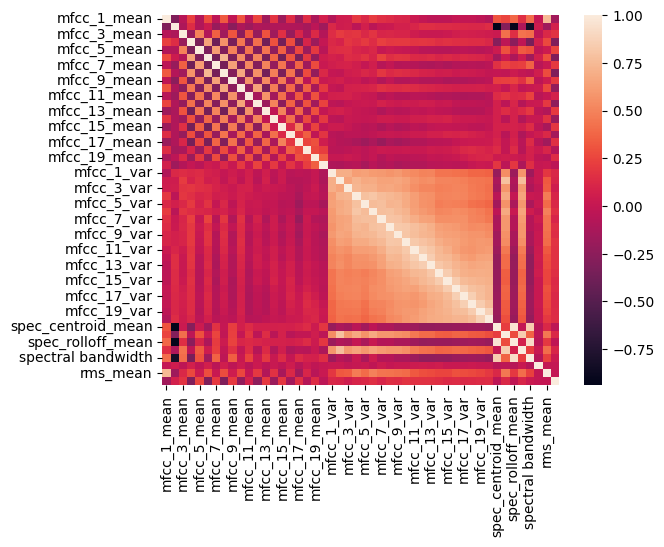

<Figure size 2000x2000 with 0 Axes>

In [ ]:
sns.heatmap(df.corr());
plt.figure(figsize=(20, 20))

In [ ]:
df.corr()

,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,...,mfcc_19_var,mfcc_20_var,spec_centroid_mean,spec_centroid_variance,spec_rolloff_mean,spec_rolloff_var,spectral bandwidth,tempo,rms_mean,genre
mfcc_1_mean,1.000000,-0.315269,-0.059288,0.223919,-0.086960,0.269786,-0.035942,0.332424,-0.023901,0.308741,...,-0.035659,-0.083974,0.306960,0.247714,0.386493,0.158081,0.404750,-0.002683,0.750296,-0.159739
mfcc_2_mean,-0.315269,1.000000,-0.105750,0.143557,-0.083069,0.032973,-0.201300,-0.078949,-0.261682,-0.109582,...,0.113562,0.138090,-0.935684,-0.288095,-0.918348,-0.103461,-0.835599,0.042033,-0.176130,0.070622
mfcc_3_mean,-0.059288,-0.105750,1.000000,-0.200603,0.489614,-0.082300,0.357169,-0.162728,0.304505,-0.249680,...,0.056382,0.043466,0.030787,0.414876,0.148952,0.430538,0.406322,-0.031980,0.119198,0.172425
mfcc_4_mean,0.223919,0.143557,-0.200603,1.000000,-0.323705,0.639657,-0.384729,0.564219,-0.340898,0.444574,...,0.139628,0.113180,-0.277966,-0.033421,-0.261256,-0.021230,-0.339251,0.071167,0.263099,-0.306182
mfcc_5_mean,-0.086960,-0.083069,0.489614,-0.323705,1.000000,-0.321206,0.612976,-0.307067,0.490011,-0.295307,...,-0.059620,-0.043419,0.032277,0.289669,0.100015,0.328473,0.292291,-0.024803,0.034528,0.250651
mfcc_6_mean,0.269786,0.032973,-0.082300,0.639657,-0.321206,1.000000,-0.365853,0.733945,-0.325869,0.544819,...,0.105227,0.064102,-0.142858,0.025585,-0.108445,0.044987,-0.160650,0.069914,0.286352,-0.312710
mfcc_7_mean,-0.035942,-0.201300,0.357169,-0.384729,0.612976,-0.365853,1.000000,-0.352746,0.630874,-0.310845,...,-0.069353,-0.050682,0.167623,0.247980,0.213054,0.223495,0.358713,-0.046050,0.014888,0.198646
mfcc_8_mean,0.332424,-0.078949,-0.162728,0.564219,-0.307067,0.733945,-0.352746,1.000000,-0.291730,0.664034,...,0.023353,-0.009971,-0.001216,-0.017086,0.035424,-0.006810,-0.035416,0.058626,0.281652,-0.312731
mfcc_9_mean,-0.023901,-0.261682,0.304505,-0.340898,0.490011,-0.325869,0.630874,-0.291730,1.000000,-0.252064,...,-0.064282,-0.039991,0.220253,0.226629,0.237198,0.166230,0.346401,-0.035307,0.043770,0.201892
mfcc_10_mean,0.308741,-0.109582,-0.249680,0.444574,-0.295307,0.544819,-0.310845,0.664034,-0.252064,1.000000,...,0.084314,0.059824,0.068282,-0.000369,0.106260,-0.013218,0.014760,0.033929,0.254703,-0.222801


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.shape

(3986, 47)

In [ ]:
y=np.array(y)

In [ ]:
#KNN

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_onehot = ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [ ]:
y_onehot.shape

(3986, 10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [ ]:
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [ ]:
nearest_neighbors=[3,5,7]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
models=[]

In [ ]:
X_train.shape

(3188, 47)

In [ ]:
for i in nearest_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
  dictionary={'neighbors':i,'cross validation score':np.mean(cv_scores)}
  models.append(dictionary)

In [ ]:
models

[{'neighbors': 3, 'cross validation score': 0.6123094970525028},
 {'neighbors': 5, 'cross validation score': 0.5316851008458034},
 {'neighbors': 7, 'cross validation score': 0.490282131661442}]

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy_score(y_test,knn_final.predict(X_test_scaled))

0.6328320802005013

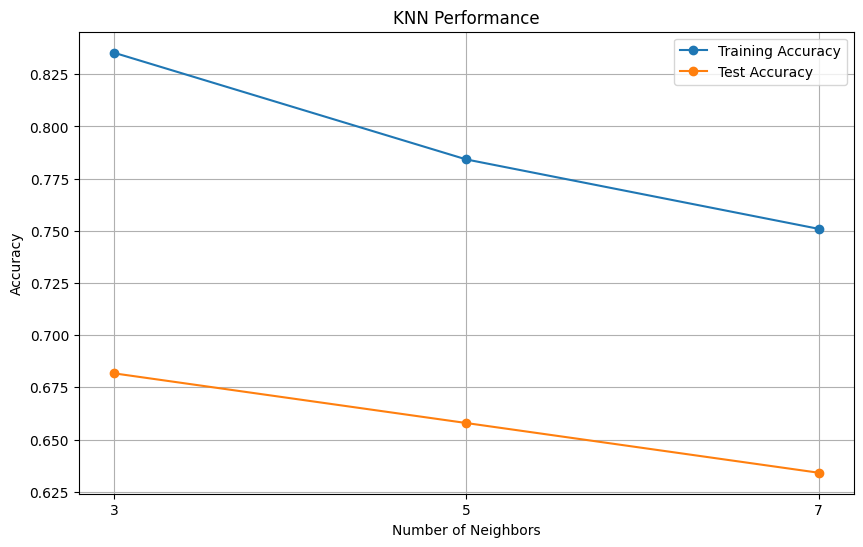

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracies = []
test_accuracies = []

for i in nearest_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train_scaled))
    train_accuracies.append(train_accuracy)

    test_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(nearest_neighbors, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(nearest_neighbors, test_accuracies, marker='o', label='Test Accuracy')
plt.title('KNN Performance')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(nearest_neighbors)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#SVM

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
print(X_train_scaled.shape)

(3188, 47)


In [ ]:
from sklearn.svm import SVC

In [ ]:
Cs=[0.1,0.5,1,3,5,10]
kernels=["linear", "poly", "rbf", "sigmoid"]
degrees=[1,3,5]
models=[]
for c in Cs:
  for kernel in kernels:
      if kernel=='poly':
        for degree in degrees:
          print(c,kernel,degree)
          svc = SVC(C=c,kernel=kernel,degree=degree)
          # svc.fit(X_train_scaled,y_train)
          cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
          # y_predict=knn.predict(X_test_scaled)
          dictionary={'c':c,'kernel':kernel,'degree':degree,'cross validation score':np.mean(cv_scores)}
          models.append(dictionary)
      else:
        print(c,kernel)
        svc = SVC(C=c,kernel=kernel)
        # svc.fit(X_train_scaled,y_train)
        cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
        # y_predict=knn.predict(X_test_scaled)
        dictionary={'c':c,'kernel':kernel,'cross validation score':np.mean(cv_scores)}
        models.append(dictionary)


0.1 linear
0.1 poly 1
0.1 poly 3
0.1 poly 5
0.1 rbf
0.1 sigmoid
0.5 linear
0.5 poly 1
0.5 poly 3
0.5 poly 5
0.5 rbf
0.5 sigmoid
1 linear
1 poly 1
1 poly 3
1 poly 5
1 rbf
1 sigmoid
3 linear
3 poly 1
3 poly 3
3 poly 5
3 rbf
3 sigmoid
5 linear
5 poly 1
5 poly 3
5 poly 5
5 rbf
5 sigmoid
10 linear
10 poly 1
10 poly 3
10 poly 5
10 rbf
10 sigmoid


In [ ]:
for model in models:
  print(model)

{'c': 0.1, 'kernel': 'linear', 'cross validation score': 0.6044576113541631}
{'c': 0.1, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.4830657027701363}
{'c': 0.1, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.3889534111208988}
{'c': 0.1, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.2970517167561503}
{'c': 0.1, 'kernel': 'rbf', 'cross validation score': 0.508146533269686}
{'c': 0.1, 'kernel': 'sigmoid', 'cross validation score': 0.4369487655201941}
{'c': 0.5, 'kernel': 'linear', 'cross validation score': 0.6163732818905233}
{'c': 0.5, 'kernel': 'poly', 'degree': 1, 'cross validation score': 0.5605379841833044}
{'c': 0.5, 'kernel': 'poly', 'degree': 3, 'cross validation score': 0.5439097847964842}
{'c': 0.5, 'kernel': 'poly', 'degree': 5, 'cross validation score': 0.39774019084363915}
{'c': 0.5, 'kernel': 'rbf', 'cross validation score': 0.6213889558717145}
{'c': 0.5, 'kernel': 'sigmoid', 'cross validation score': 0.41937865090574455}
{'c': 1, 'ker

In [ ]:
svm_final = SVC(C=10,kernel="rbf")
svm_final.fit(X_train_scaled,y_train)

SVC(C=10)

In [ ]:
accuracy_score(y_test,svm_final.predict(X_test_scaled))

0.7330827067669173

In [ ]:
#Random Forest Analysis

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)
print(X_train_scaled.shape)

(3188, 47)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimators=[5,10,20,100,150,200]
max_depths=[10,20,50,100]
models=[]
for n in n_estimators:
  for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth)
    cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
    dictionary={'n_estimator':n,'max_depth':max_depth,'cross validation score':np.mean(cv_scores)}
    models.append(dictionary)

In [ ]:
for model in models:
  print(model)

{'n_estimator': 5, 'max_depth': 10, 'cross validation score': 0.5159992716642963}
{'n_estimator': 5, 'max_depth': 20, 'cross validation score': 0.5228968076258717}
{'n_estimator': 5, 'max_depth': 50, 'cross validation score': 0.5150544037243545}
{'n_estimator': 5, 'max_depth': 100, 'cross validation score': 0.5185076007736107}
{'n_estimator': 10, 'max_depth': 10, 'cross validation score': 0.5884568633337106}
{'n_estimator': 10, 'max_depth': 20, 'cross validation score': 0.5843757227993681}
{'n_estimator': 10, 'max_depth': 50, 'cross validation score': 0.5837517162640316}
{'n_estimator': 10, 'max_depth': 100, 'cross validation score': 0.5740195764826306}
{'n_estimator': 20, 'max_depth': 10, 'cross validation score': 0.6198195892777173}
{'n_estimator': 20, 'max_depth': 20, 'cross validation score': 0.6323627111804452}
{'n_estimator': 20, 'max_depth': 50, 'cross validation score': 0.6286048926443015}
{'n_estimator': 20, 'max_depth': 100, 'cross validation score': 0.6220203441878318}
{'n_e

In [ ]:
rf_final=RandomForestClassifier(n_estimators=200,max_depth=20)
rf_final.fit( X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [ ]:
accuracy_score(y_test,rf_final.predict(X_test_scaled))

0.6992481203007519